# ChunkedGraph cost - Figure 2.ipynb

This notebook creates the cost plots presented in Figure 2 of the CAVE paper.

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='white', font_scale=1., context="notebook")


## Define relevant paths and create directories


In [2]:
data_dir = f"{os.path.realpath('')}/../data"
figure2_dir = f"{os.path.realpath('')}/../figures/figure_2/"

if not os.path.exists(figure2_dir):
    os.makedirs(figure2_dir)

## Load data

In [3]:
pcg_storage_df = pd.read_csv(f"{data_dir}/PCG_estimates_storage.csv")
pcg_storage_df["bigtable"] /= 1000
pcg_storage_df["gcs"] /= 1000

pcg_cost_df = pd.read_csv(f"{data_dir}/PCG_estimates_cost.csv")
pcg_cost_df["bigtable"] /= 1000
pcg_cost_df["gcs"] /= 1000

pcg_storage_df["version"] = pcg_storage_df["version"].replace(1, "original").replace(2, "v2")
pcg_cost_df["version"] = pcg_cost_df["version"].replace(1, "original").replace(2, "v2")

pcg_cost_df["total"] = pcg_cost_df["gcs"] + pcg_cost_df["bigtable"]

## Plotting

### Storage

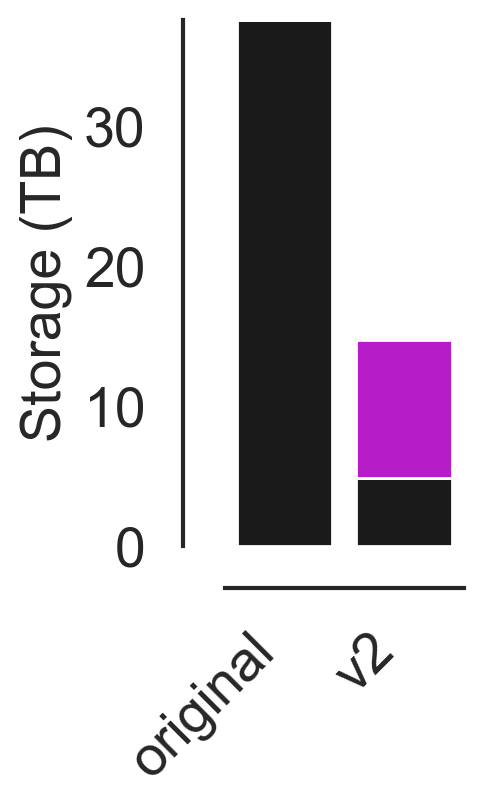

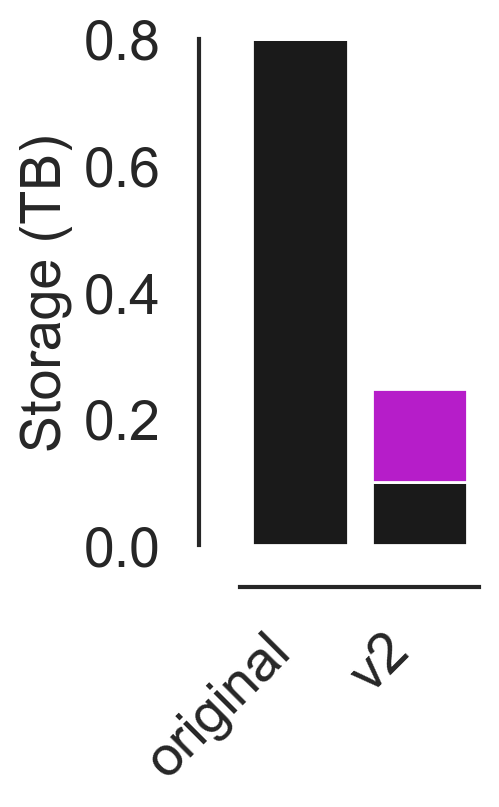

In [4]:
for dataset_name in pcg_storage_df["dataset"].unique():
    sub_df = pcg_storage_df[pcg_storage_df["dataset"] == dataset_name]

    fig = plt.figure(figsize=(2.5, 4.2), facecolor="white", dpi=200)
    plt.tick_params(length=10, width=1.5, labelsize=20)

    for ax in fig.axes:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(0)
        ax.spines["top"].set_linewidth(0)

    sns.barplot(x='version', y='bigtable', data=sub_df, color='k')
    sns.barplot(x='version', y='gcs', data=sub_df, color=[.8, .0, .9], bottom=sub_df['bigtable'])

    sns.despine(offset=15, trim=False)
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("")
    plt.tight_layout()

    plt.ylabel("Storage (TB)", fontsize=20)
    fig.subplots_adjust(left=0.45)
    plt.savefig(f"{figure2_dir}/pcg_storage_{dataset_name}.png", dpi=300)
    plt.savefig(f"{figure2_dir}/pcg_storage_{dataset_name}.pdf", dpi=300)

    plt.show()

### Cost

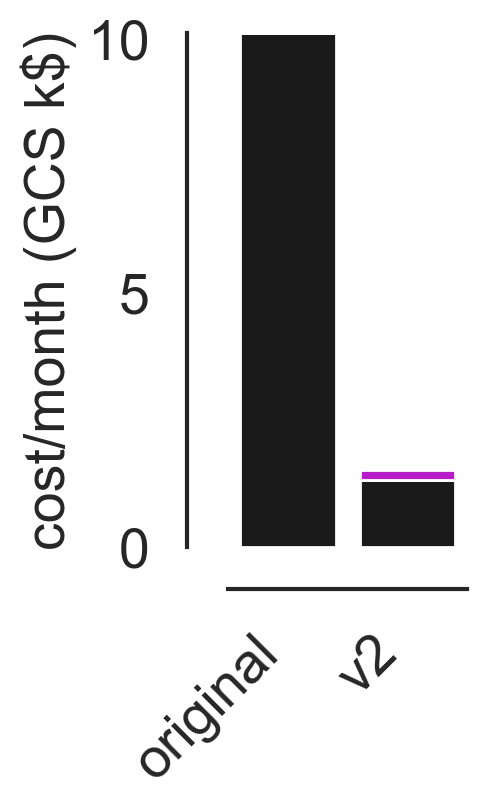

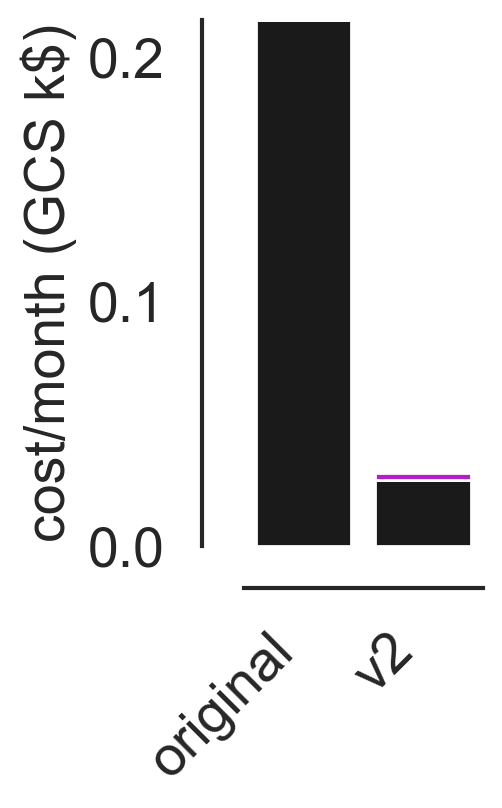

In [5]:
for dataset_name in pcg_cost_df["dataset"].unique():
    sub_df = pcg_cost_df[pcg_cost_df["dataset"] == dataset_name]

    fig = plt.figure(figsize=(2.5, 4.2), facecolor="white", dpi=200)
    plt.tick_params(length=10, width=1.5, labelsize=20)

    for ax in fig.axes:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(0)
        ax.spines["top"].set_linewidth(0)

    sns.barplot(x='version', y='bigtable', data=sub_df, color='k')
    sns.barplot(x='version', y='gcs', data=sub_df, color=[.8, .0, .9], bottom=sub_df['bigtable'])

    sns.despine(offset=15, trim=False)
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("")
    plt.tight_layout()

    plt.ylabel("cost/month (GCS k$)", fontsize=20)
    fig.subplots_adjust(left=0.45)
    plt.savefig(f"{figure2_dir}/pcg_cost_{dataset_name}.png", dpi=300)
    plt.savefig(f"{figure2_dir}/pcg_cost_{dataset_name}.pdf", dpi=300)

    plt.show()